In [1]:
# Add soundscapy to the Python path
import sys
sys.path.append('..')

from soundscapy import isd
from soundscapy.database import ecod, grouped_ecod
from soundscapy.parameters import PARAM_LIST
import matplotlib.pyplot as plt



C:\Users\mitch\miniconda3\envs\soundscapy-dev\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
ssid = isd.load_isd_dataset()
ssid = ssid.isd.filter_lockdown().isd.validate_dataset(allow_na=False)
ssid = ssid.dropna(subset=PARAM_LIST)

Renaming PAQ columns.
Checking PAQ data quality.
Identified 56 samples to remove.
[95, 108, 124, 127, 146, 154, 160, 178, 186, 203, 220, 226, 255, 381, 404, 407, 431, 562, 571, 577, 586, 590, 606, 631, 659, 666, 675, 689, 694, 707, 729, 839, 846, 877, 897, 992, 1007, 1027, 1055, 1056, 1064, 1097, 1214, 1217, 1222, 1223, 1225, 1229, 1235, 1255, 1268, 1269, 1300, 1316, 1321, 1335]


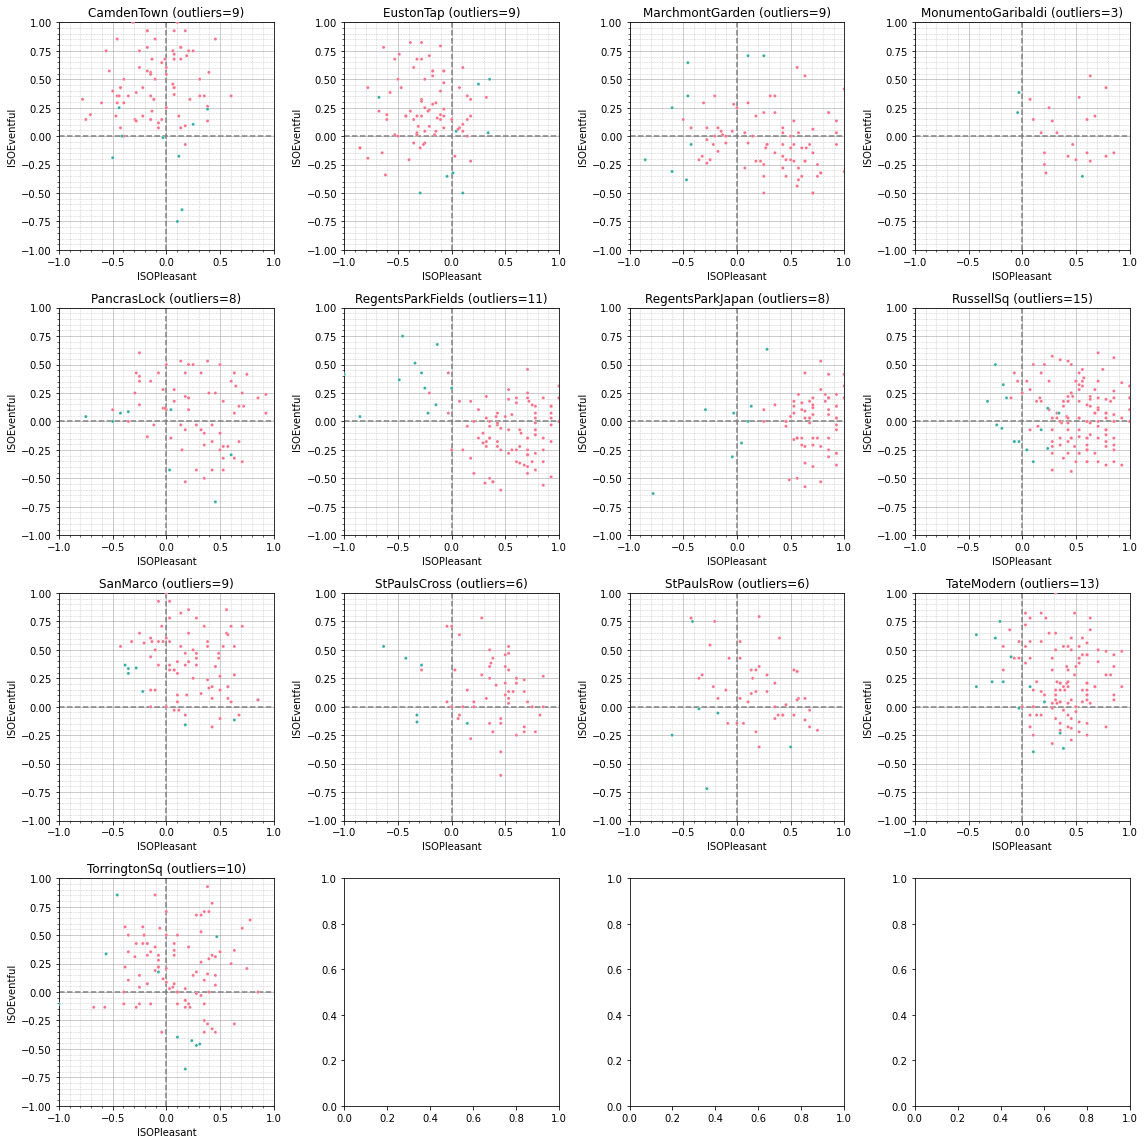

In [7]:
ssid = ssid.isd.paq_grouped_outliers()

fig, axes = plt.subplots(4, 4, figsize=(16,16))
for i, locat in enumerate(ssid.LocationID.unique()):
    ssid.isd.filter_location_ids(locat).isd.circumplex_scatter(
        ax=axes.flatten()[i],
        hue='PAQ_outliers', prim_labels=False,
        title=f"{locat} (outliers={ssid.isd.filter_location_ids(locat)['PAQ_outliers'].sum()})"
    )
plt.tight_layout()

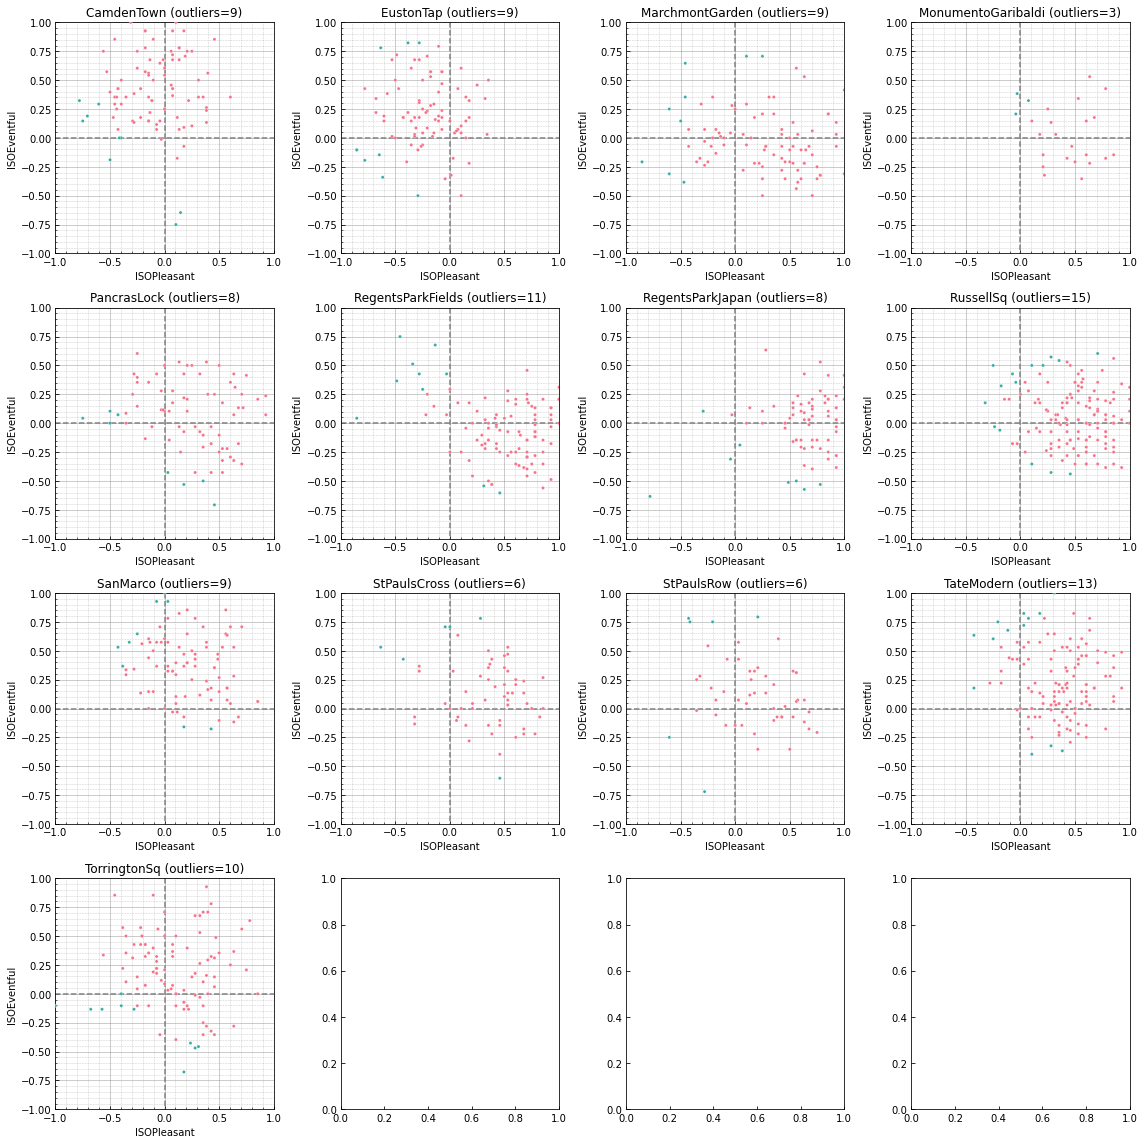

In [8]:
ssid = ssid.isd.iso_grouped_outliers()

fig, axes = plt.subplots(4, 4, figsize=(16,16))
for i, locat in enumerate(ssid.LocationID.unique()):
    ssid.isd.filter_location_ids(locat).isd.circumplex_scatter(
        ax=axes.flatten()[i],
        hue='ISO_outliers', prim_labels=False,
        title=f"{locat} (outliers={ssid.isd.filter_location_ids(locat)['ISO_outliers'].sum()})"
    )
plt.tight_layout()

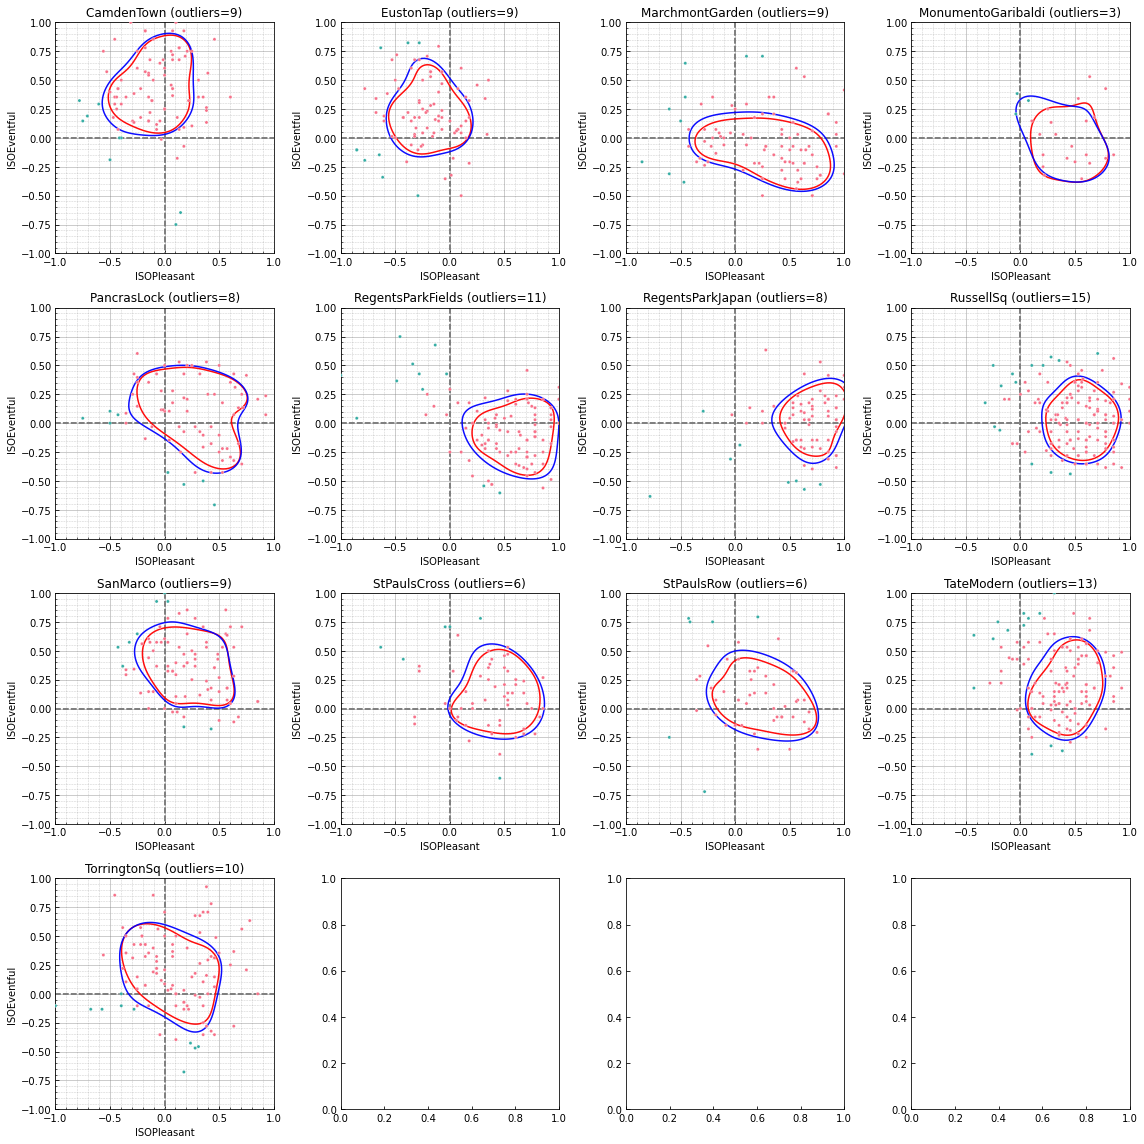

In [9]:
fig, axes = plt.subplots(4, 4, figsize=(16,16))
for i, locat in enumerate(ssid.LocationID.unique()):
    ssid.query("ISO_outliers==0").isd.filter_location_ids(locat).isd.circumplex_density(
        ax=axes.flatten()[i], prim_labels=False, incl_scatter=False, fill=False, thresh=0.5, levels=2,
        title=None, fill_color='red'
    )
    ssid.isd.filter_location_ids(locat).isd.circumplex_density(
        ax=axes.flatten()[i], prim_labels=False, fill=False, thresh=0.5, levels=2,
        title=None
    )
    ssid.isd.filter_location_ids(locat).isd.circumplex_scatter(
        ax=axes.flatten()[i],
        hue='ISO_outliers', prim_labels=False,
        title=f"{locat} (outliers={ssid.isd.filter_location_ids(locat)['ISO_outliers'].sum()})"
    )
plt.tight_layout()

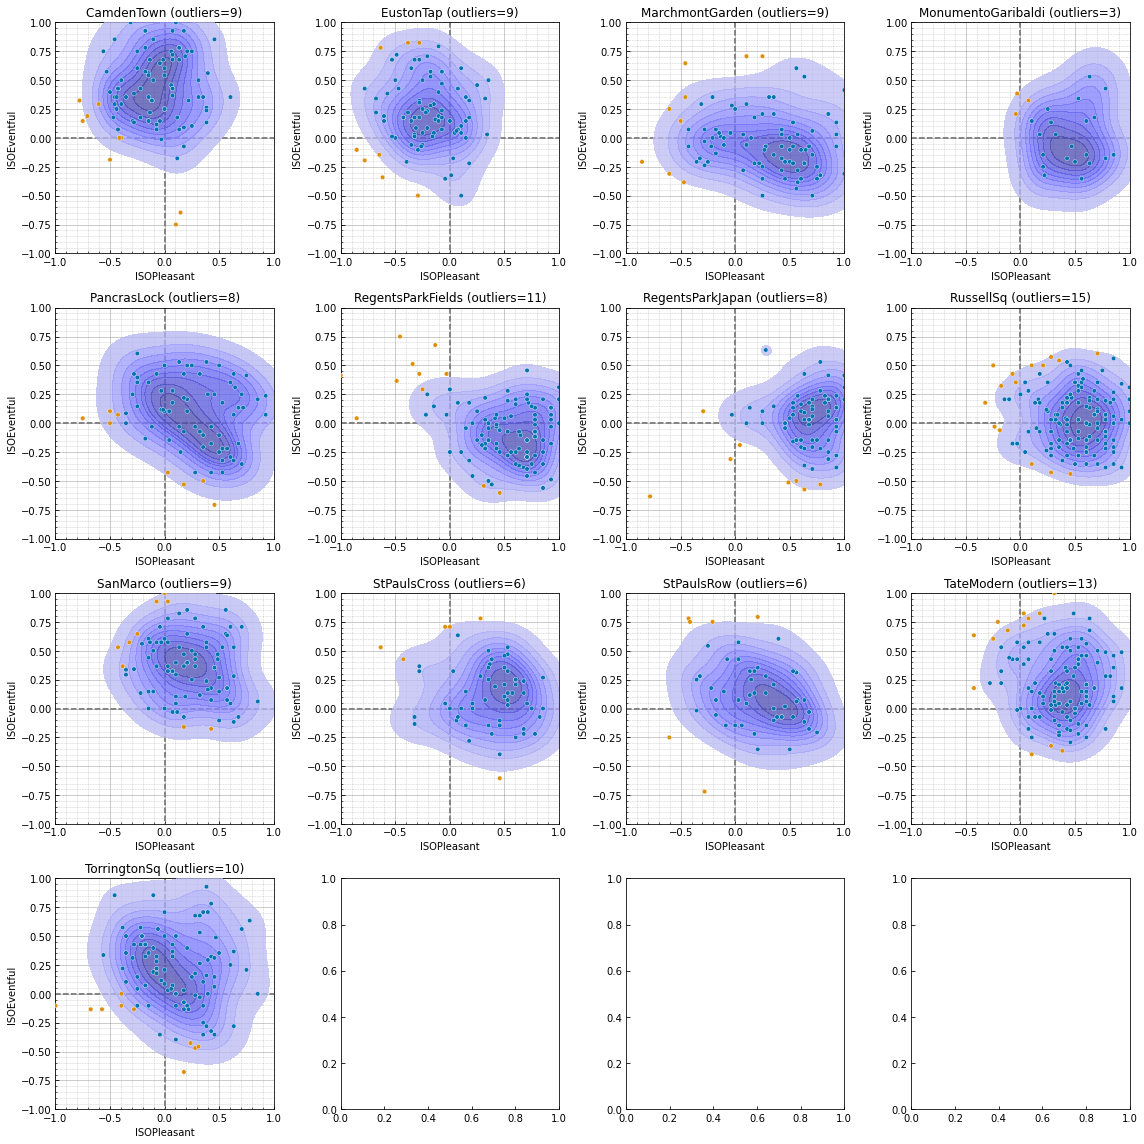

In [10]:
fig, axes = plt.subplots(4, 4, figsize=(16,16))
for i, locat in enumerate(ssid.LocationID.unique()):
    ssid.query("ISO_outliers==0").isd.filter_location_ids(locat).isd.circumplex_density(
        ax=axes.flatten()[i], prim_labels=False, alpha=0.75,
        title=None
    )
    ssid.isd.filter_location_ids(locat).isd.circumplex_scatter(
        ax=axes.flatten()[i],
        hue='ISO_outliers', prim_labels=False, palette='colorblind', s=20,
        title=f"{locat} (outliers={ssid.isd.filter_location_ids(locat)['ISO_outliers'].sum()})")
plt.tight_layout()

In [11]:
ssid, fits = grouped_ecod(ssid, groupby='LocationID', features=PARAM_LIST, new_col='bin_outs')

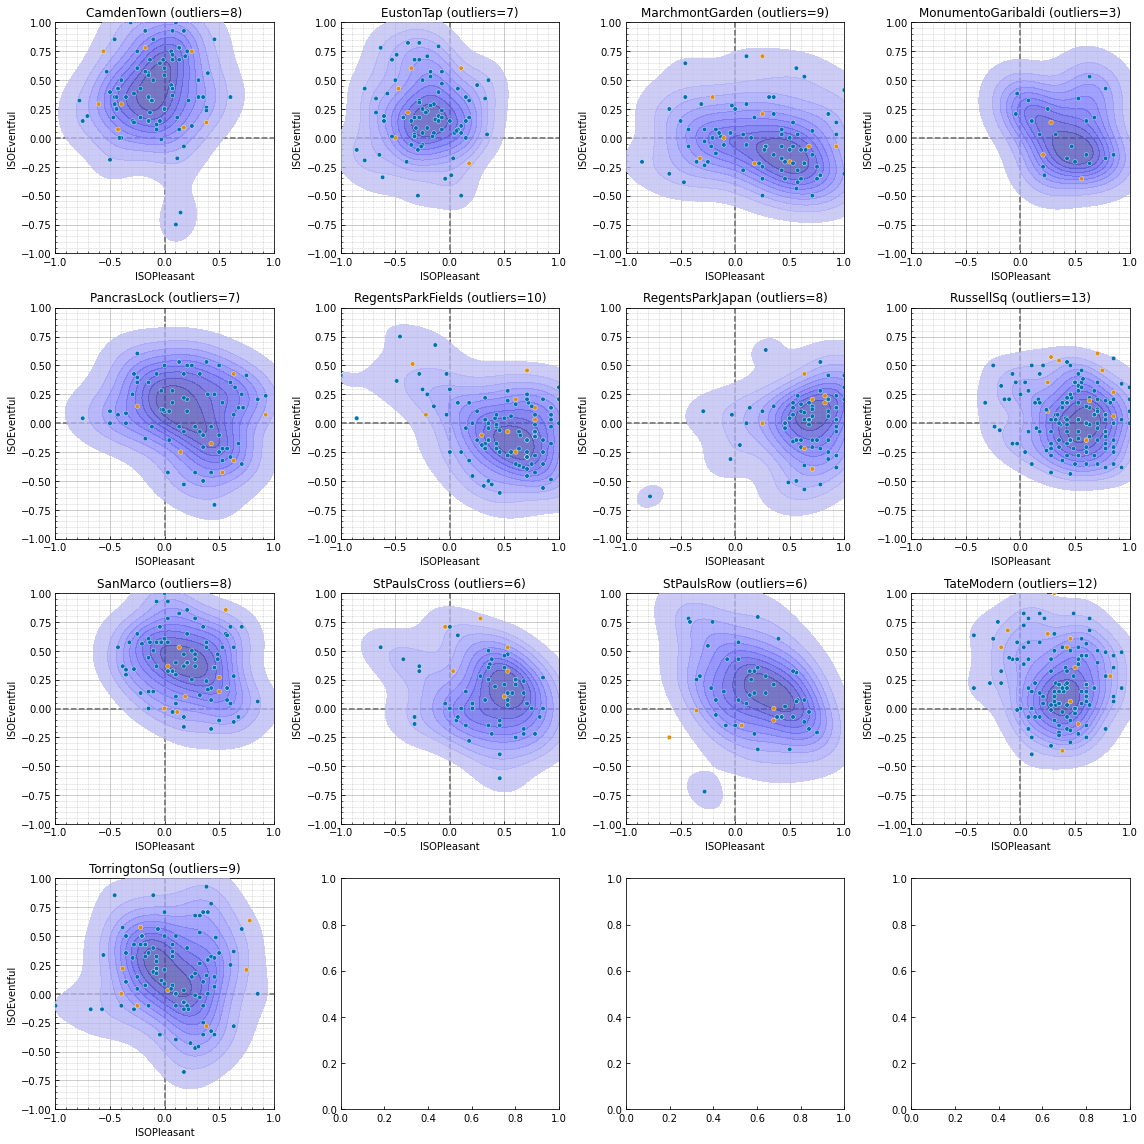

In [12]:
fig, axes = plt.subplots(4, 4, figsize=(16,16))
for i, locat in enumerate(ssid.LocationID.unique()):
    ssid.query("bin_outs==0").isd.filter_location_ids(locat).isd.circumplex_density(
        ax=axes.flatten()[i], prim_labels=False, alpha=0.75,
        title=None
    )
    ssid.isd.filter_location_ids(locat).isd.circumplex_scatter(
        ax=axes.flatten()[i],
        hue='bin_outs', prim_labels=False, palette='colorblind', s=20,
        title=f"{locat} (outliers={ssid.isd.filter_location_ids(locat)['bin_outs'].sum()})")
plt.tight_layout()